# Rootfinding
Julia introduction.

A library function to find roots is called `nlsolve` and is in the package `NLsolve`. We'll sometimes use that as a standard to compare our methods against.

For help with this package see https://github.com/JuliaNLSolvers/NLsolve.jl

In [2]:
using NLsolve, SpecialFunctions

In [3]:
ω = []
for guess = [6.,10.,13.,16.,19.]
    s = nlsolve(x->besselj(4,x[1]),[guess],ftol=1e-14)
    append!(ω,s.zero)
end
ω

5-element Vector{Any}:
  7.588342434503804
 11.064709488501185
 17.615966049804832
 49.32036068639027
 14.37253667161759

[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
[ Info: GR


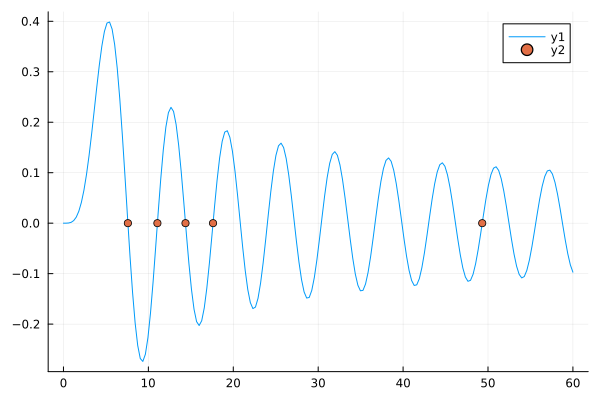

In [4]:
using Plots
x = range(0, 60, length = 200);
plot(x, besselj.(4, x))
scatter!(ω, besselj.(4, ω))

Why did we need a bunch of different starting values? How do you think those should be selected? The starting values are from the textbook, which used `besselj(3, x)`. Try to find the 5th smallest root greater than 0.

## Double root

In [5]:
@. f(x) = (x-2)
nlsolve(f, [1.0])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [1.0]
 * Zero: [1.9999999999947804]
 * Inf-norm of residuals: 0.000000
 * Iterations: 1
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 2
 * Jacobian Calls (df/dx): 2

In [6]:
@. f(x) = (x-2)^2
nlsolve(f, [1.0])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [1.0]
 * Zero: [1.9999389648437513]
 * Inf-norm of residuals: 0.000000
 * Iterations: 14
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 15
 * Jacobian Calls (df/dx): 15

Compare the accuracy of the zero. Why is the zero bad in one example and not the other?

## Newton's method


In [7]:
nlsolve(f, [1.0], method = :newton)

Results of Nonlinear Solver Algorithm
 * Algorithm: Newton with line-search
 * Starting Point: [1.0]
 * Zero: [1.9999389648437513]
 * Inf-norm of residuals: 0.000000
 * Iterations: 14
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 15
 * Jacobian Calls (df/dx): 15

## Finding function inverses

Using root finding. Demo 4.3.7 in the text.

In [8]:
function newton(f,dfdx,x₁;maxiter=40,ftol=100*eps(),xtol=100*eps())
    x = [float(x₁)]
    y = f(x₁)
    Δx = Inf   # for initial pass below
    k = 1

    while (abs(Δx) > xtol) && (abs(y) > ftol)
        dydx = dfdx(x[k])
        Δx = -y/dydx            # Newton step
        push!(x,x[k]+Δx)        # append new estimate

        k += 1
        y = f(x[k])
        if k==maxiter
            @warn "Maximum number of iterations reached."
            break   # exit loop
        end
    end
    return x
end

newton (generic function with 1 method)

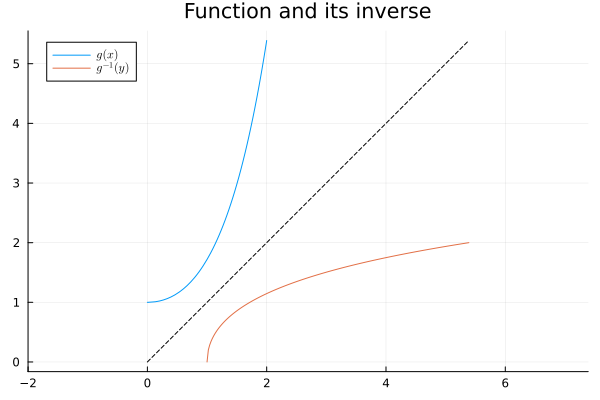

In [10]:
using LaTeXStrings
g = x -> exp(x) - x
dgdx = x -> exp(x) - 1
y = range(g(0),g(2),length=200)
x = zeros(length(y))
for (i,y) in enumerate(y)
    f2 = x -> g(x) - y
    dfdx = x -> dgdx(x)
    r = newton(f2,dfdx,y)
    x[i] = r[end]
end

plot(g,0,2,aspect_ratio=1,label=L"g(x)")
plot!(y,x,label=L"g^{-1}(y)",title="Function and its inverse")
plot!(x->x,0,maximum(y),label="",l=(:dash,1),color=:black)

## Secant method


In [11]:
function secant(f,x₁,x₂;maxiter=40,ftol=100*eps(),xtol=100*eps())
    x = [float(x₁),float(x₂)]
    y₁ = f(x₁)
    Δx,y₂ = Inf,Inf   # for initial pass in the loop below
    k = 2

    while (abs(Δx) > xtol) && (abs(y₂) > ftol) 
        y₂ = f(x[k])
        Δx = -y₂ * (x[k]-x[k-1]) / (y₂-y₁)   # secant step
        push!(x,x[k]+Δx)        # append new estimate

        k += 1
        y₁ = y₂    # current f-value becomes the old one next time
        
        if k==maxiter
            @warn "Maximum number of iterations reached."
            break   # exit loop
        end
    end
    return x
end

secant (generic function with 1 method)

In [12]:
secant( x -> x^2 -2000, 1, 2)

16-element Vector{Float64}:
   1.0
   2.0
 667.3333333333334
   4.982071713147434
   7.919947220118008
 158.07276020628112
  19.59078786165358
  28.687763851020215
  53.067372672614496
  43.08456208629481
  44.579285101412204
  44.724012263794684
  44.72135532973897
  44.721359549870634
  44.721359549995796
  44.721359549995796

In [13]:
secant(cos, 0, 4*pi+0.5); # almost seems like a random number generator; what's going on?

In [14]:
secant(cos, 5.1*pi, 5.1*pi+0.1)

9-element Vector{Float64}:
 16.022122533307943
 16.122122533307945
 18.693513777453397
 17.358914745558444
 17.24119857612525
 17.27878097665127
 17.27875958971819
 17.278759594743864
 17.278759594743864

Convergence of the secant method.

In [15]:
s = secant(x -> x^2 -2, BigFloat(0.0), BigFloat(1.0))

10-element Vector{BigFloat}:
 0.0
 1.0
 2.0
 1.333333333333333333333333333333333333333333333333333333333333333333333333333322
 1.399999999999999999999999999999999999999999999999999999999999999999999999999997
 1.414634146341463414634146341463414634146341463414634146341463414634146341463419
 1.414211438474870017331022530329289428076256499133448873483535528596187175043336
 1.414213562057320462628134245838438779474612235139416036579898986880248647679399
 1.414213562373095285920609310001120157482019293261385662822929068797171892606328
 1.414213562373095048801688697736988785422636075341347349412575502255151434573165

In [16]:
e = abs.( s .- sqrt(BigFloat(2.0)))

10-element Vector{BigFloat}:
 1.414213562373095048801688724209698078569671875376948073176679737990732478462102
 0.414213562373095048801688724209698078569671875376948073176679737990732478462102
 0.585786437626904951198311275790301921430328124623051926823320262009267521537898
 0.08088022903976171546835539087636474523633854204361473984334640465739914512878016
 0.01421356237309504880168872420969807856967187537694807317667973799073247846210543
 0.0004205839683683658324576172537165555766695880376860731647836766434138630013172887
 2.123898225031470666193880408650493415376243499199693144209394545303418766280943e-06
 3.157745861735544783712592990950596402375320365967807511104838307827033093646021e-10
 2.371189205857914220789123474178844375896462493308064394141442255964164202664476e-16
 2.64727092931470358000356007237641042357355810438889374706157537439618766862395e-26

In [17]:
-log10.(e)

10-element Vector{BigFloat}:
 -0.1505149978319905976068694473622465133840949407310542706552137305635540946372098
  0.3827756853378630783193995241920061132387223687070682985559555710056771255439819
  0.2322606875058724807125300768297595998546274279760140279007418404421230309067613
  1.092157627563397996326957504276881022293478660873778191286563051753029309234371
  1.847297060349608039744459677851525312947977224659096354357439251889923187357561
  3.376147285577060288499540023565964852340030536637974311131920870344344202495443
  5.672866298026645457437160413737674044360678639933570724543125719831873486299767
  9.500622825336954258593827118396792423414601215979177932495524644590337906785455
 15.62503379069427746018544193712580609388848399367542218130649338262141298146623
 25.5772016094787175328985593070344623680954319280760396169083868216261799921373

In [18]:
e[2:end] ./ (e[1:end-1]) .^ 1.8 # too large

9-element Vector{BigFloat}:
   0.2219715519870524556507716410039774442827777450045589700699572659764255949193616
   2.862434423782295639076421816590325369725376098814694441756140920020605721833907
   0.2117930038360401254933153338253490912720788042718605235478802728359945570604612
   1.313973689796811359037521881156464971184378583984835740534841587834798664106528
   0.8891753674177591617636662098292634167813733904535607091967884208086795803196791
   2.536289454712365859161419632481358237154572950458188901728964491023722278991118
   5.134953452112168558051608746423195861358924573474878258063746515973281470082147
  29.92866154112021817161227952996161271177648714489872019605425890785061396668415
 353.0686961568822558216376584798846887115829043712231857161599829109958053897187

In [19]:
e[2:end] ./ (e[1:end-1]) .^ 1.5 # too small

9-element Vector{BigFloat}:
 0.246292857752354009672375490952976937393548216124875804303724973615191420840442
 2.197368226935619932079602390481356757088786241854315487488823157685750107110623
 0.1803987000487323281332410684554631400203573544593384815604323652176629911803499
 0.6179301431721353267490831765603032340308078232466212235791604339869765150069844
 0.2481980156312295114472713591854604708255047452931863447863880048302812387402741
 0.2462377478475913625406364625412540556178665296392277224105868998816775179767232
 0.102017956894914469012065495756480064839034913595413443290675574628942355254882
 0.04225717376612557279378046343625060021555857224611248148890353540630106710948046
 0.007250184801939879282169268099097270719986826297064447620695898777098293416690695

In [20]:
e[2:end] ./ (e[1:end-1]) .^ 1.618 # just right

9-element Vector{BigFloat}:
 0.2364237209413780545900456130383475129614159134537934865690873875731015587833704
 2.438205863656519648834260695473233415507341618487941233961680621530301786328183
 0.1921499009022535567498353473469444650526517435672535824680719207508417081484283
 0.8314075826171767606195999546873149824768702777663746291613071341943741121728988
 0.4099957530259139298503563438177514870710001213398846644034005627425658644980425
 0.6162259883379817546267810748484395292645377538721865877857637363845004287062135
 0.4765131004164239702700018008302930670571048465581251318818166482608155606038925
 0.5584366854342216414160162793740730949062328366660926114866594905812549550486088
 0.5059447151766831072100874826791793670317327235024682024982054441788464235374427

## Multidimensional Newton

In [21]:
function newtonsys(f,jac,x₁;maxiter=40,ftol=1000*eps(),xtol=1000*eps())
    x = [float(x₁)]
    y,J = f(x₁),jac(x₁)
    Δx = Inf   # for initial pass below
    k = 1

    while (norm(Δx) > xtol) && (norm(y) > ftol)
        Δx = -(J\y)             # Newton step
        push!(x,x[k] + Δx)    # append to history
        k += 1
        y,J = f(x[k]),jac(x[k])

        if k==maxiter
            @warn "Maximum number of iterations reached."
            break
        end
    end
    return x
end

newtonsys (generic function with 1 method)

In [22]:
function func(x)
    [  exp(x[2]-x[1]) - 2,
       x[1]*x[2] + x[3],
       x[2]*x[3] + x[1]^2 - x[2]
    ];
end;
   
function jac(x)
    [ 
      -exp(x[2]-x[1])  exp(x[2]-x[1])   0
       x[2]            x[1]             1
       2*x[1]          x[3]-1           x[2]
    ];
end;

In [23]:
using LinearAlgebra # for norm
x = newtonsys(func,jac,[0,0,0])

7-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0]
 [-1.0, 0.0, 0.0]
 [-0.578586294114295, 0.1571725882285898, 0.1571725882285898]
 [-0.4631386148886986, 0.23090368503021674, 0.11545249687009654]
 [-0.45802686753214106, 0.23512071352763037, 0.10771316029325663]
 [-0.4580332807487811, 0.23511389981124436, 0.10768999092388233]
 [-0.45803328064126886, 0.23511389991867646, 0.10768999090411432]

In [24]:
func(x[end])

3-element Vector{Float64}:
  0.0
 -1.3877787807814457e-17
  0.0